<a href="https://colab.research.google.com/github/JitheshPavan/QC_LLM_HealthCare/blob/main/MakeMore_Classical_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'
txt=requests.get(url).text
words=txt.splitlines()

In [ ]:
#Lookup Table
chars= sorted(list(set("".join(words)))) # set is a list where duplication not possible
stoi ={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos= {i:s for s,i in stoi.items()}

In [ ]:
# stoi

#Bigram Model, No Parameters


In [ ]:
b={}
for w in words:
  chs= ['<S>']+ list(w)+ ['<E>']
  for bigram in zip(chs, chs[1:]):
    b[bigram]= b.get(bigram,0)+1

In [ ]:
# sorted(b.items(), key= lambda kv: -kv[1]

In [ ]:
# a= torch.zeros((27,27),dtype=torch.int32)
# keys=list(b.keys())
# values= list(b.values())
# for i in range(len(list(b))):
#   ch1,ch2 =keys[i]
#   j,l=0,27
#   if not (ch1=='<S>'):
#     j=ord(ch1)-96
#   if not (ch2=='<E>'):
#     l=ord(ch2)-96
#   a[j,l]= values[i]

In [ ]:
chars= sorted(list(set("".join(words))))
stoi ={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos= {i:s for s,i in stoi.items()}

In [ ]:
N= torch.zeros((27,27),dtype=torch.int32)
for w in words:
  chs= ['.']+ list(w)+ ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1= stoi[ch1]
    ix2= stoi[ch2]
    N[ix1,ix2] +=1

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize=(16,16))
# plt.imshow(N,cmap='Blues')
# for i in range(27):
#   for j in range(27):
#     chstr= itos[i]+ itos[j]
#     plt.text(j,i,chstr,ha="center", va="bottom",color='gray')
#     plt.text(j,i+0.3 ,N[i,j].item(), ha="center", va="bottom",color='gray')
# plt.axis('off')

In [ ]:
#27,27
#27,1

In [ ]:
P= (N+1).float() # 1 added because model smoothing, so that there is no sudden jump. Loss will be inf if there is 0
P /= P.sum(1, keepdim=True) #inplace operation
# N[:,1].sum() == N[1,:].sum(). Because you reach a char and then you go from that char to a new char. So both of the sum will be the same.

In [ ]:
g= torch.Generator().manual_seed(2147483647)
for i in range(5):
  loss=0.0
  ix=0
  out=[]
  while True:
    ix1=ix
    ix= torch.multinomial(P[ix,:],num_samples=1,replacement=True, generator=None).item()
    out.append(itos[ix])
    loss += -1*torch.log(P[ix1,ix])
    if ix==0:
      break
  new_word="".join(out)
  print(f'word={new_word}; Negative Log Likelihood= {loss/len(list(new_word))}')
#It is bad because bigram model is bad. Only considering two words at once is unsophisticated

word=sikae.; Negative Log Likelihood= 2.583893060684204
word=kyara.; Negative Log Likelihood= 2.024794816970825
word=ke.; Negative Log Likelihood= 1.9164432287216187
word=fannetorei.; Negative Log Likelihood= 2.4798879623413086
word=jeuronylynn.; Negative Log Likelihood= 2.4195005893707275


In [ ]:
log_likelihood= 0.0
n=0

for w in ["jithesh"]:
  chs= ['.']+ list(w)+ ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1= stoi[ch1]
    ix2= stoi[ch2]
    prob= P[ix1,ix2]
    logprob= torch.log(prob)
    log_likelihood += logprob
    n +=1
print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-20.0124)
nll=tensor(20.0124)
2.5015556812286377


##Trigram Model


In [ ]:
# Building Bigram
N=torch.zeros((27,27,27),dtype=torch.int32)
for w in words[:1]:
  for (i,j),k in zip(zip('.'+'.'+w+'.',('.'+'.'+w+'.')[1:]),('.'+'.'+w+'.')[2:]):
    print(i,j,"-->",k)

. . --> e
. e --> m
e m --> m
m m --> a
m a --> .


In [ ]:
# Building Bigram
N=torch.zeros((27,27,27),dtype=torch.int32)
for w in words:
  for (i,j),k in zip(zip('.'+'.'+w+'.',('.'+'.'+w+'.')[1:]),('.'+'.'+w+'.')[2:]):
    N[stoi[i],stoi[j],stoi[k]] +=1

In [ ]:
P=N.float()
P= P/P.sum(2,keepdim=True)

In [ ]:
for i in range(10):
  ix=0
  ix1=0
  word=[]
  while(True):
    ix2=torch.multinomial(P[ix,ix1,:],1).item()
    ix=ix1
    ix1=ix2
    word.append(itos[ix1])
    if ix1 ==0:
      break
  print("".join(word))

cavey.
luan.
am.
til.
mah.
hol.
ken.
marsonsle.
marykel.
talexsy.


##Tetragram Model
run on your own peril


In [ ]:
N=torch.zeros((27,27,27,27),dtype=torch.int32)
for w in words:
  for ((i,j),k),l in zip(zip(zip('.'+'.'+'.'+w+'.',('.'+'.'+'.'+w+'.')[1:]),('.'+'.'+'.'+w+'.')[2:]),('.'+'.'+'.'+w+'.')[3:]):
    N[stoi[i],stoi[j],stoi[k],stoi[l]] +=1
P=N.float()
P= P/P.sum(3,keepdim=True)

In [ ]:
for i in range(10):
  ix=0
  ix1=0
  ix2=0
  word=[]
  while(True):
    ix3=torch.multinomial(P[ix,ix1,ix2,:],1).item()
    ix=ix1
    ix1=ix2
    ix2=ix3
    if ix3 ==0:
      break
    word.append(itos[ix3])
  print("".join(word))

ire
rexli
yannie
javelyne
giana
rhylin
aydaluna
naiyannolaramshoshundolyv
see
jezawid


# A one layer NN with one-hot embedding



In [ ]:
#Compliling the data
xs=[]
ys=[]
for w in words:
  chars= ['.']+ list(w) +['.']
  for i,j in zip(chars,chars[1:]):
    ix1= stoi[i]
    ix2= stoi[j]
    xs.append(ix1)
    ys.append(ix2)
xs= torch.tensor(xs) # Input , If you use torch.Tensor dtype becomes float32
ys= torch.tensor(ys) # Output

torch.Size([228146, 27])


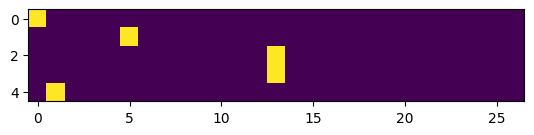

In [ ]:
import torch.nn.functional as F
#One_hot encodding returns zero tensor of dimension of 27 with index corresponding to the input turned to 1
xenc= F.one_hot(xs,num_classes=27).float() #Casted into float.
print(xenc.shape)
plt.imshow(xenc[:5]) # If you cannot infer structure from a tensor,  just select small part of it then just plot it. :)
num= xs.nelement()

A Simple one hidden layer with a softmax function

In [ ]:
# We have 27 Neurons Each Neuron takes 27 inputs (One_hot_encoding). Neuron is along colums because we are doing x*W rather than the conventin W*x
W= torch.rand((27,27))
logits=(xenc @ W ) #logits=Log counts.In our prevoius model we had counts. The current model can be interpreted as outputing log of these counts
counts= logits.exp() # Why log? because exp() of NN output gives us positive number that can interpreted as counts or probs.
probs = counts/ counts.sum(1, keepdim=True) # N* 27/ N* 1 =>(Brodcasted into) N *27/N*27 . If keep dim=False N*27/N = N * 27/ * N (27 and N mismatch;error)

In [ ]:
#Training
g= torch.Generator().manual_seed(2147483647)
W= torch.rand((27,27),requires_grad=True,generator=g)
epoch=100
for k in range(epoch):
  #Forward_Pass
  logits=xenc @ W
  counts= logits.exp()
  probs = counts/ counts.sum(1, keepdim=True)
  #loss
  loss = -1 * probs[np.arange(num),ys].log().mean() + 0.01* (W**2).mean()
  if k%(epoch/10) ==0:
    print(f"Avg nll Loss:{loss}")
  W.grad=None
  loss.backward()
  W.data -= 50*W.grad # To do inplace operation you need W.data, 2.470386028289795

Avg nll Loss:3.3630003929138184
Avg nll Loss:2.6191165447235107
Avg nll Loss:2.549192428588867
Avg nll Loss:2.5238564014434814
Avg nll Loss:2.5109965801239014
Avg nll Loss:2.5033318996429443
Avg nll Loss:2.4983174800872803
Avg nll Loss:2.4948277473449707
Avg nll Loss:2.492290735244751
Avg nll Loss:2.4903860092163086


Intuition behind Regularization </br>
  In the previous model, we attempted smooth the model by adding 1 to every value of the probability table. Max smoothing results in a unifrom distribution. That is if the values are smooth, every output has the same probaility or every weight is the same. We can add this in our model by addition of W**2 to the loss function. That is we are attempting make all weight zero or make all weight uniform

In [ ]:
num_words=10
for i in range(num_words):
  ix=0
  new_word=[]
  while(True):
    xenc1= F.one_hot(torch.tensor(ix),num_classes=27).float()
    logits=xenc1 @ W
    counts= logits.exp()
    probs = counts/ counts.sum()
    ix= torch.multinomial(probs,num_samples=1,replacement=True, generator=None).item()
    new_word.append(itos[ix])
    if(ix==0):
      break;
  print("".join(new_word))


tyo.
ash.
aylyn.
araathemintem.
ttey.
gllibeetor.
ksa.
y.
relelonbalargunn.
han.


#MLP

In [ ]:
X,Y =[],[]
word_size=3
for w in words:
 # print(f'name= {w}')
  context=[0]* word_size
  for ch in w+'.':
    ix= stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(f'{"".join(itos[i] for i in context)}  ----> {itos[ix]}')
    context= context[1:]+ [ix]
X= torch.tensor(X)
Y=torch.tensor(Y)

In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
#Network Structure
C  = torch.randn((27,2))
W1 = torch.randn((6,100))
b1 = torch.randn((100))
W2 = torch.randn((100,27))
b2 = torch.randn((27))
parameters=[C,W1,b1,W2,b2]
for p in parameters:
  p.requires_grad=True;

In [ ]:
X.shape,C[X].shape

(torch.Size([228146, 3]), torch.Size([228146, 3, 2]))

##Training

In [ ]:
#Forward Pass
emb=C[X] #indexing w.r.t every single value in X tensor. Shape= [X,block_size,2]
h= torch.tanh(emb.view(-1,6) @ W1 + b1) # 6 because block_size=3 *2 =6 . shape= [X,100]
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts/ counts.sum(1,keepdim=True)
# loss =-probs[torch.arange(32),Y].log().mean()
loss= F.cross_entropy(logits,Y)
loss

tensor(19.1712, grad_fn=<NllLossBackward0>)

In [ ]:
#Training
epoch=100000
for i in range(epoch):
  ix= torch.randint(0,X.shape[0],(32,))
  emb=C[X[ix]]
  h= torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  loss= F.cross_entropy(logits,Y[ix])
  if i% (epoch/10) ==0:
    print(loss.item())
  for p in parameters:
    p.grad=None;
  loss.backward()
  for p in parameters:
    p.data -=0.1 *p.grad

9.432333946228027
2.3038008213043213
2.3117563724517822
2.60101580619812
2.4816956520080566
2.532094717025757
2.0966603755950928
2.5064187049865723
2.444317579269409
2.246396780014038


##Choosing better LR


In [ ]:
lre = torch.linspace(-3, 0, 1000) # Exponential makes sure that we lrs from close to 0 to 1. But never equal to zero
lrs = 10**lre

In [ ]:
lri = []
lossi = []
for i in range(1000):
    # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,)) # Batch size can often be too low that gradient may fluctuate. So sometimes we need more accurate gradient.

  # forward pass
  emb = C[X[ix]] # (32, 3, 10)
  h= torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lr)
  lossi.append(loss.item())

#print(loss.item())

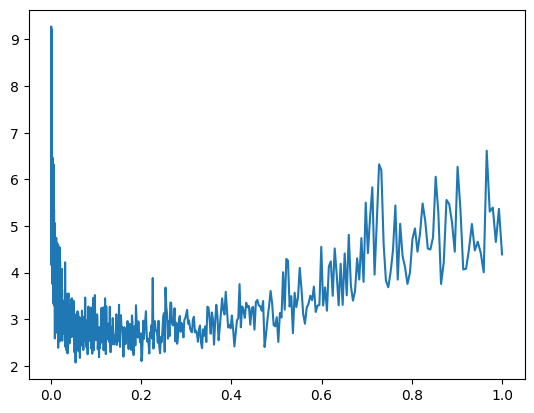

In [ ]:
plt.plot(lrs,lossi)

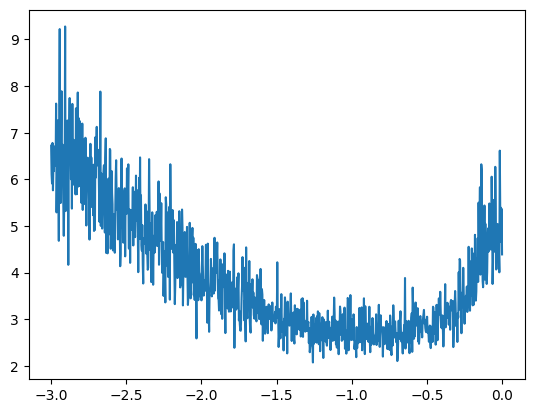

In [ ]:
plt.plot(lre,lossi)

## Train/Test Val

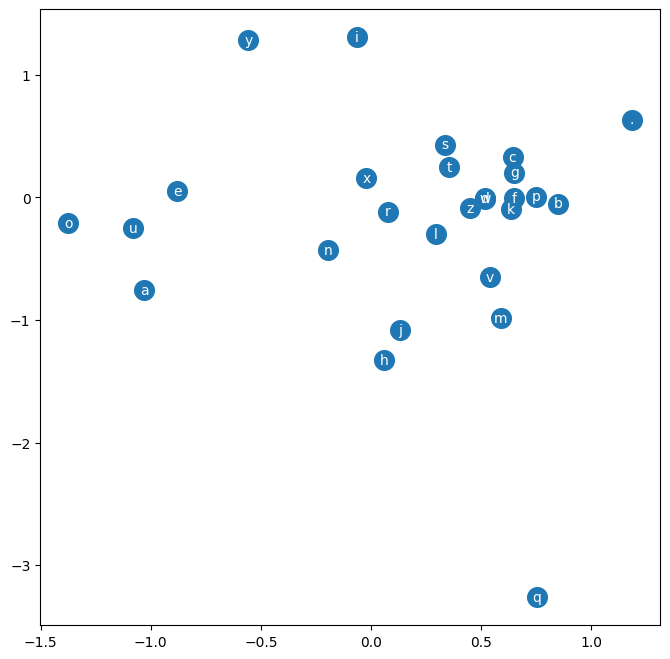

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center',va='center',color='white')

Inferring from embedding- Vowels are together. q and . are not clustered. That is they are unique

#Trash
